In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt

from datetime import date

In [2]:
pd.__version__,np.__version__, mpl.__version__

('0.24.2', '1.16.3', '3.0.3')

In [3]:
df = pd.DataFrame({
    'name':[
        'john','mary','peter','jeff','bill'
    ],
    'date_of_birth':[
        '2000-01-01', '1999-12-20', '2000-11-01', '1995-02-25', '1992-06-30',
    ],
})
df

,name,date_of_birth
0,john,2000-01-01
1,mary,1999-12-20
2,peter,2000-11-01
3,jeff,1995-02-25
4,bill,1992-06-30


In [4]:
df.index

RangeIndex(start=0, stop=5, step=1)

## use date column as index

In [5]:
datetime_series = pd.to_datetime(df['date_of_birth'])

datetime_index = pd.DatetimeIndex(datetime_series.values)

df2=df.set_index(datetime_index)

df2.drop('date_of_birth',axis=1,inplace=True)

df2

,name
2000-01-01,john
1999-12-20,mary
2000-11-01,peter
1995-02-25,jeff
1992-06-30,bill


In [6]:
df2.index

DatetimeIndex(['2000-01-01', '1999-12-20', '2000-11-01', '1995-02-25',
               '1992-06-30'],
              dtype='datetime64[ns]', freq=None)

## fill empty periods

In [7]:
df = pd.DataFrame({
    'name':[
        'john','mary','peter','jeff','bill'
    ],
    'year_born':[
        '2000', '1999', '2001', '1995', '1992',
    ],
})
df

,name,year_born
0,john,2000
1,mary,1999
2,peter,2001
3,jeff,1995
4,bill,1992


In [8]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [9]:
datetime_series = pd.to_datetime(df['year_born'])

datetime_index = pd.DatetimeIndex(datetime_series.values)

df3=df.set_index(datetime_index)

df3.drop('year_born',axis=1,inplace=True)

df3.sort_index(inplace=True)

df3

,name
1992-01-01,bill
1995-01-01,jeff
1999-01-01,mary
2000-01-01,john
2001-01-01,peter


In [10]:
df3.index

DatetimeIndex(['1992-01-01', '1995-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01'],
              dtype='datetime64[ns]', freq=None)

In [11]:
df4=df3.asfreq('YS')
df4

,name
1992-01-01,bill
1993-01-01,NaN
1994-01-01,NaN
1995-01-01,jeff
1996-01-01,NaN
1997-01-01,NaN
1998-01-01,NaN
1999-01-01,mary
2000-01-01,john
2001-01-01,peter


In [12]:
df4.index

DatetimeIndex(['1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
               '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

## lag columns

In [13]:
df = pd.DataFrame(
    data={'reading': np.random.uniform(high=100,size=10)},
    index=pd.to_datetime([date(2019,1,d) for d in range(1,11)])
)
df

,reading
2019-01-01,58.720972
2019-01-02,3.101846
2019-01-03,84.729331
2019-01-04,67.595894
2019-01-05,82.898735
2019-01-06,59.234635
2019-01-07,43.735153
2019-01-08,16.699276
2019-01-09,31.154091
2019-01-10,45.747997


In [14]:
df['reading_d_minus_1']=df['reading'].shift(1,freq='D')

df['reading_d_minus_2']=df['reading'].shift(2,freq='D')

In [15]:
df

,reading,reading_d_minus_1,reading_d_minus_2
2019-01-01,58.720972,NaN,NaN
2019-01-02,3.101846,58.720972,NaN
2019-01-03,84.729331,3.101846,58.720972
2019-01-04,67.595894,84.729331,3.101846
2019-01-05,82.898735,67.595894,84.729331
2019-01-06,59.234635,82.898735,67.595894
2019-01-07,43.735153,59.234635,82.898735
2019-01-08,16.699276,43.735153,59.234635
2019-01-09,31.154091,16.699276,43.735153
2019-01-10,45.747997,31.154091,16.699276


## plot data aggregated by day

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


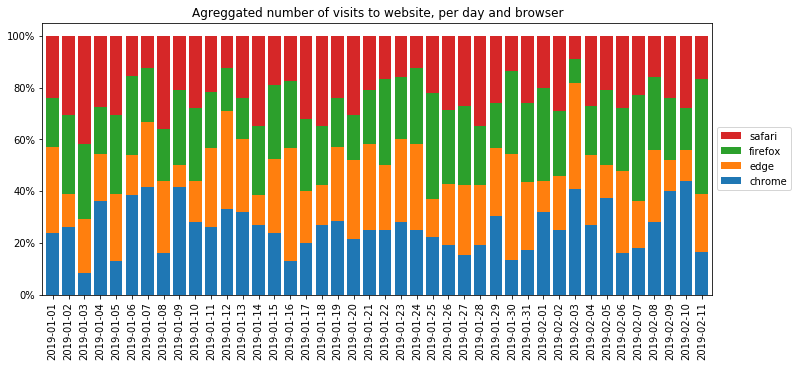

In [17]:
from datetime import date,datetime,timedelta

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

np.random.seed(42)

# create a dummy dataset
df = pd.DataFrame(
    index=pd.to_datetime(
        [datetime(2019,1,1)+timedelta(hours=h+10*np.random.uniform()) for h in range(0,1000)]
    ),
    data={
        'browser': np.random.choice([
            'chrome',
            'firefox',
            'safari',
            'edge'
        ],size=1000,replace=True)
    },
    
)

print(type(df.index))
# 'pandas.core.indexes.datetimes.DatetimeIndex'

# just to make it more intuitive
df.index.name= 'login_datetime'

df.groupby(by=[lambda dt: dt.strftime('%Y-%m-%d'),'browser']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True,legend='reverse',width=0.8)

current_handles, current_labels = plt.gca().get_legend_handles_labels()

# sort or reorder the labels and handles
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

# call plt.legend() with the new values
plt.legend(reversed_handles,reversed_labels,loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.gcf().set_size_inches(12,5)
plt.title('Agreggated number of visits to website, per day and browser')
plt.show()